In [40]:
#!pip install geopandas
#!pip install contextily
import geopandas
import contextily as ctx
import matplotlib as plt

In [70]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf")
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.shp")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf")
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/ds964_nil_wm/NIL_WM.dbf")

1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia


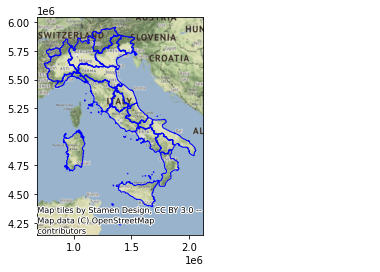

In [42]:
ax = regioni.to_crs(epsg=3857).plot(facecolor = "none", edgecolor = "blue")
ctx.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa (https://contextily.readthedocs.io/en/latest/providers_deepdive.html)


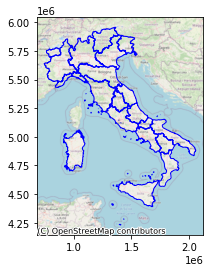

In [43]:
ax = regioni.to_crs(epsg=3857).plot(facecolor = "none", edgecolor = "blue")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

3. visualizzare le province della Lombardia su una mappa di contextily


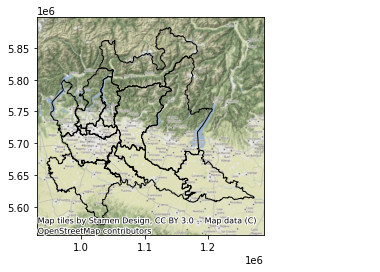

In [44]:
lombardia = regioni[regioni["DEN_REG"] == "Lombardia"].geometry.squeeze()
ax = province[province.within(lombardia)].to_crs(epsg=3857).plot(edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti


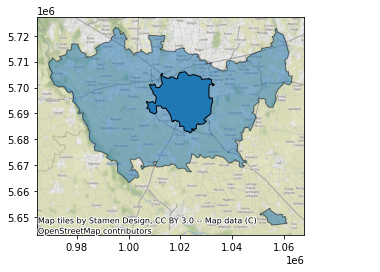

In [71]:
prov_milano = province[province["SIGLA"] == "MI"]
com_milano = comuni[comuni["COMUNE"] == "Milano"]
ax = prov_milano.to_crs(epsg=3857).plot(edgecolor = "k", alpha = 0.5)
com_milano.to_crs(epsg=3857).plot(ax=ax, edgecolor = "k")
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 


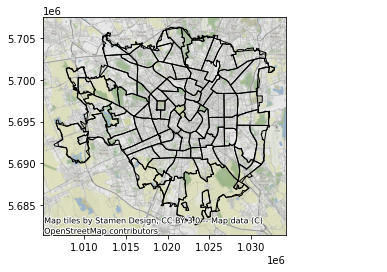

In [75]:
ax = quartieri.to_crs(epsg=3857).plot(edgecolor = "k", facecolor = "none")
com_milano.to_crs(epsg=3857).plot(ax=ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.


Inserire una provincia della Lombardia: Milano


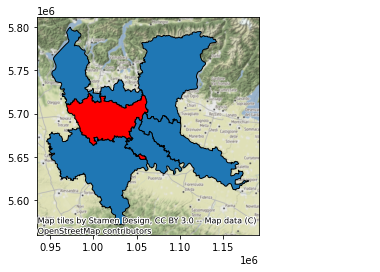

In [135]:
prov_lombardia = province[province.within(lombardia)]
a = input("Inserire una provincia della Lombardia: ")
lst = list(prov_lombardia["DEN_UTS"])
if a not in lst:
  print("Errore")
else:
  p1 = prov_lombardia[prov_lombardia["DEN_UTS"] == a].geometry.squeeze()
  p2 = prov_lombardia[prov_lombardia["DEN_UTS"] == a]
  ax = prov_lombardia[prov_lombardia.touches(p1)].to_crs(epsg=3857).plot(edgecolor = "k")
  #ax = province[province.touches(p1)].to_crs(epsg=3857).plot(edgecolor = "k")
  p2.to_crs(epsg=3857).plot(ax=ax, color = "r", edgecolor = "k")
  ctx.add_basemap(ax)